In [43]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)


print("Files in dataset:", os.listdir(path))
csv_path = os.path.join(path, "student_depression_dataset.csv")
df = pd.read_csv(csv_path)

Path to dataset files: /Users/heni/.cache/kagglehub/datasets/adilshamim8/student-depression-dataset/versions/1
Files in dataset: ['student_depression_dataset.csv']


### Motivation

### Basic stats

In [44]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

The dataset contains **27,901 entries** and **18 columns**. Each row represents an individual student's response to a mental health survey, covering aspects such as academic stress, lifestyle habits, and mental health indicators. There are **no missing values** in any of the columns, which simplifies preprocessing.

- **Numerical (`float64` and `int64`)**:
  - `Age`, `Academic Pressure`, `Work Pressure`, `CGPA`, `Study Satisfaction`, `Job Satisfaction`, `Work/Study Hours`
  - `Depression` (target: binary 0/1), `id`

- **Categorical (`object`)**:
  - `Gender`, `City`, `Profession`, `Sleep Duration`, `Dietary Habits`, `Degree`
  - `Have you ever had suicidal thoughts ?`, `Financial Stress`, `Family History of Mental Illness`

This combination of quantitative and qualitative data supports both statistical analysis and rich visual exploration.

####  Data Cleaning and Preprocessing

While the dataset is complete, several preprocessing steps were needed to prepare it for analysis:

1. **Binary Conversion**  
   To enable numerical comparison, `Yes`/`No` responses were mapped to binary values:
   - `Have you ever had suicidal thoughts ?` → `Suicidal_Thoughts`
   - `Family History of Mental Illness`  
   ```python
   {"Yes": 1, "No": 0}

2. **Ordinal Encoding**  

- **Financial stress**
 ```python
   {"Low": 1, "Medium": 2, "High": 3}
```
- **Sleep duration**
 ```python
   {
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9
}
```
- **Financial stress**
 ```python
   {"Low": 1, "Medium": 2, "High": 3}
```
2. **Column Renaming**  
Long column names like "Have you ever had suicidal thoughts ?" were renamed to Suicidal_Thoughts for simplicity in coding and plotting.




In [45]:
df_clean = df.copy()

# binary conversion: convert 'Yes'/'No' to 1/0
df_clean['Suicidal_Thoughts'] = df_clean['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df_clean['Family_History'] = df_clean['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

# ordinal encoding: map 'Financial Stress' to numeric 
financial_stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
df_clean['Financial_Stress_Score'] = df_clean['Financial Stress'].map(financial_stress_map)

# map 'Sleep Duration' to estimated hours
sleep_duration_map = {
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9
}
df_clean['Sleep_Hours'] = df_clean['Sleep Duration'].map(sleep_duration_map)

# rename columns
df_clean.rename(columns={
    'Work/Study Hours': 'Work_Study_Hours',
    'Job Satisfaction': 'Job_Satisfaction',
    'Study Satisfaction': 'Study_Satisfaction',
    'Academic Pressure': 'Academic_Pressure',
    'Work Pressure': 'Work_Pressure',
    'Have you ever had suicidal thoughts ?': 'Suicidal_Thoughts',
    'Sleep Duration': 'Sleep_Duration',
    'Dietary Habits': 'Dietary_Habits',
    'Financial Stress': 'Financial_Stress',
    'Family History of Mental Illness': 'Family_History',
}, inplace=True)


print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      27901 non-null  int64  
 1   Gender                  27901 non-null  object 
 2   Age                     27901 non-null  float64
 3   City                    27901 non-null  object 
 4   Profession              27901 non-null  object 
 5   Academic_Pressure       27901 non-null  float64
 6   Work_Pressure           27901 non-null  float64
 7   CGPA                    27901 non-null  float64
 8   Study_Satisfaction      27901 non-null  float64
 9   Job_Satisfaction        27901 non-null  float64
 10  Sleep_Duration          27901 non-null  object 
 11  Dietary_Habits          27901 non-null  object 
 12  Degree                  27901 non-null  object 
 13  Suicidal_Thoughts       27901 non-null  object 
 14  Work_Study_Hours        27901 non-null

In [46]:
# one-hot encode 'Gender' and 'Profession'
df_encoded = pd.get_dummies(df_clean, columns=['Gender', 'Profession'], drop_first=True)
print(df_encoded.columns)
print(df_encoded.info())
print(df_encoded.head())
#df_encoded.to_csv("student_depression_cleaned.csv", index=False)

Index(['id', 'Age', 'City', 'Academic_Pressure', 'Work_Pressure', 'CGPA',
       'Study_Satisfaction', 'Job_Satisfaction', 'Sleep_Duration',
       'Dietary_Habits', 'Degree', 'Suicidal_Thoughts', 'Work_Study_Hours',
       'Financial_Stress', 'Family_History', 'Depression', 'Suicidal_Thoughts',
       'Family_History', 'Financial_Stress_Score', 'Sleep_Hours',
       'Gender_Male', 'Profession_'Content Writer'',
       'Profession_'Digital Marketer'', 'Profession_'Educational Consultant'',
       'Profession_'UX/UI Designer'', 'Profession_Architect',
       'Profession_Chef', 'Profession_Doctor', 'Profession_Entrepreneur',
       'Profession_Lawyer', 'Profession_Manager', 'Profession_Pharmacist',
       'Profession_Student', 'Profession_Teacher'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               ---

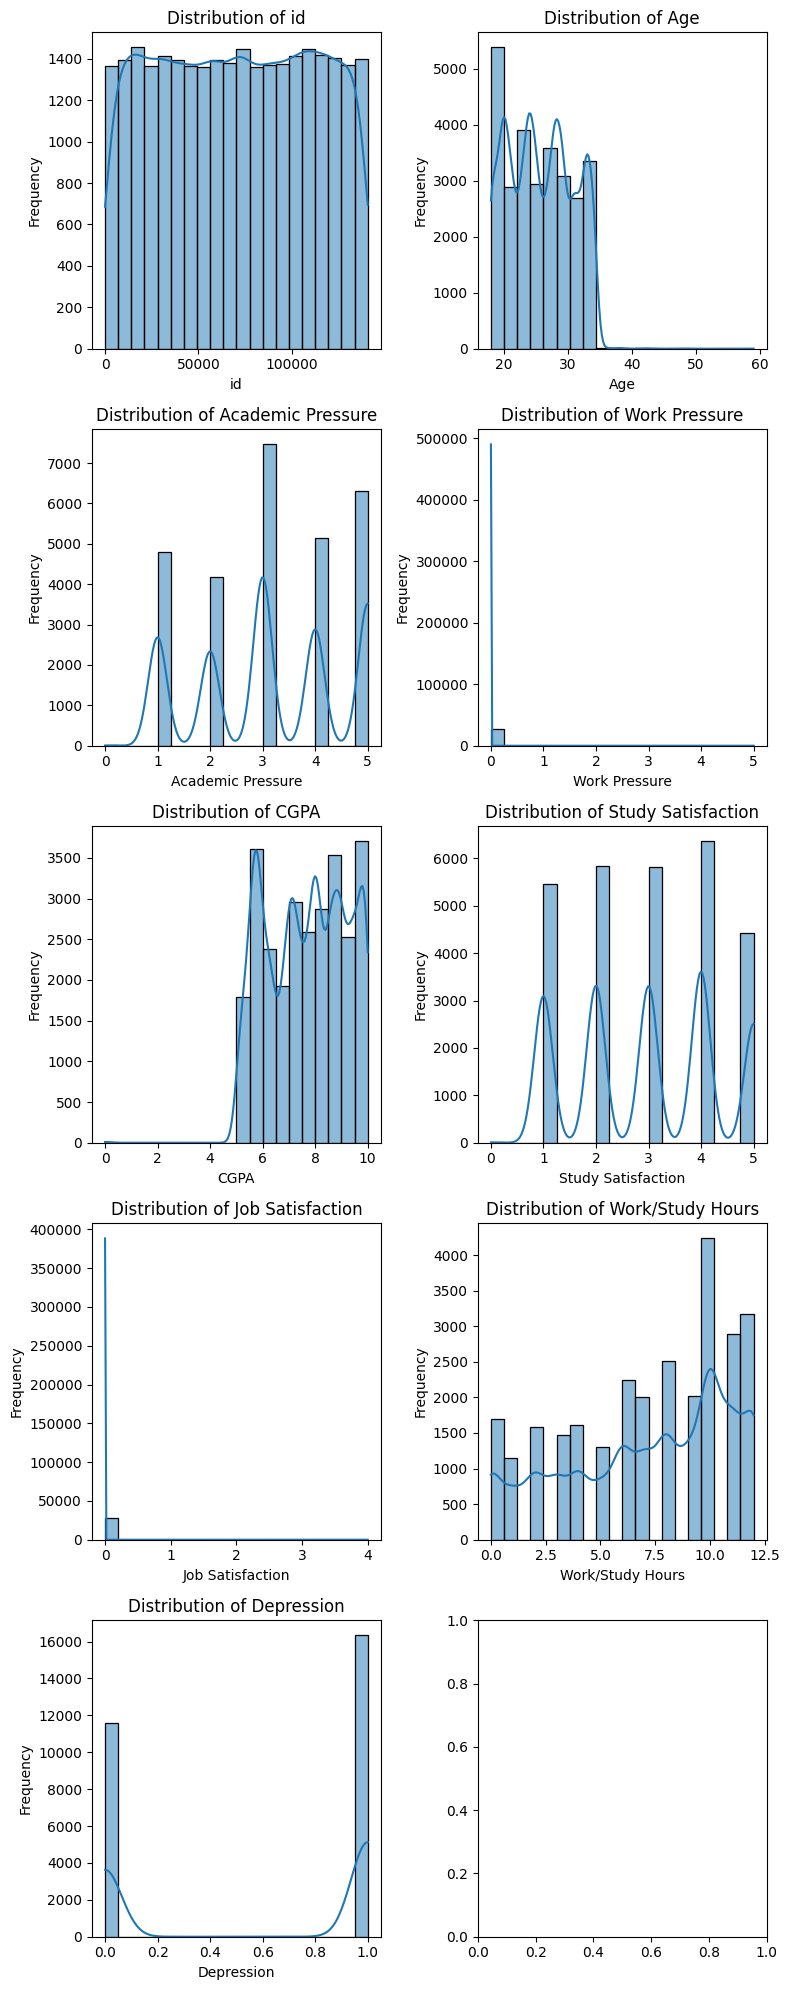

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=df.select_dtypes(include=['object']).columns.tolist()

n=len(num_cols)
cols=2
rows=math.ceil(n/cols)
fig,axes=plt.subplots(rows,cols,figsize=(cols*4,rows*4))
axes=axes.flatten()

for i , col in enumerate(num_cols):
    sns.histplot(df[col],kde=True,ax=axes[i],bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.savefig(f"plots/{col}-distribution.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/rb/kd_jtytn23s8cqfkvty6zp5r0000gp/T/ipykernel_33810/2661375801.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
/var/folders/rb/kd_jtytn23s8cqfkvty6zp5r0000gp/T/ipykernel_33810/2661375801.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
/var/folders/rb/kd_jtytn23s8cqfkvty6zp5r0000gp/T/ipykernel_33810/2661375801.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
/var/folders/rb/kd_jtytn23s8cqfkvty6zp5r0000gp/T/ipykernel_33810/2661375801.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
/var/folders/rb/kd_jtytn23s8cqfkvty6zp5r0000gp/T/ipykernel_33810/2661375801.py:12: UserWarning: FixedFormatt

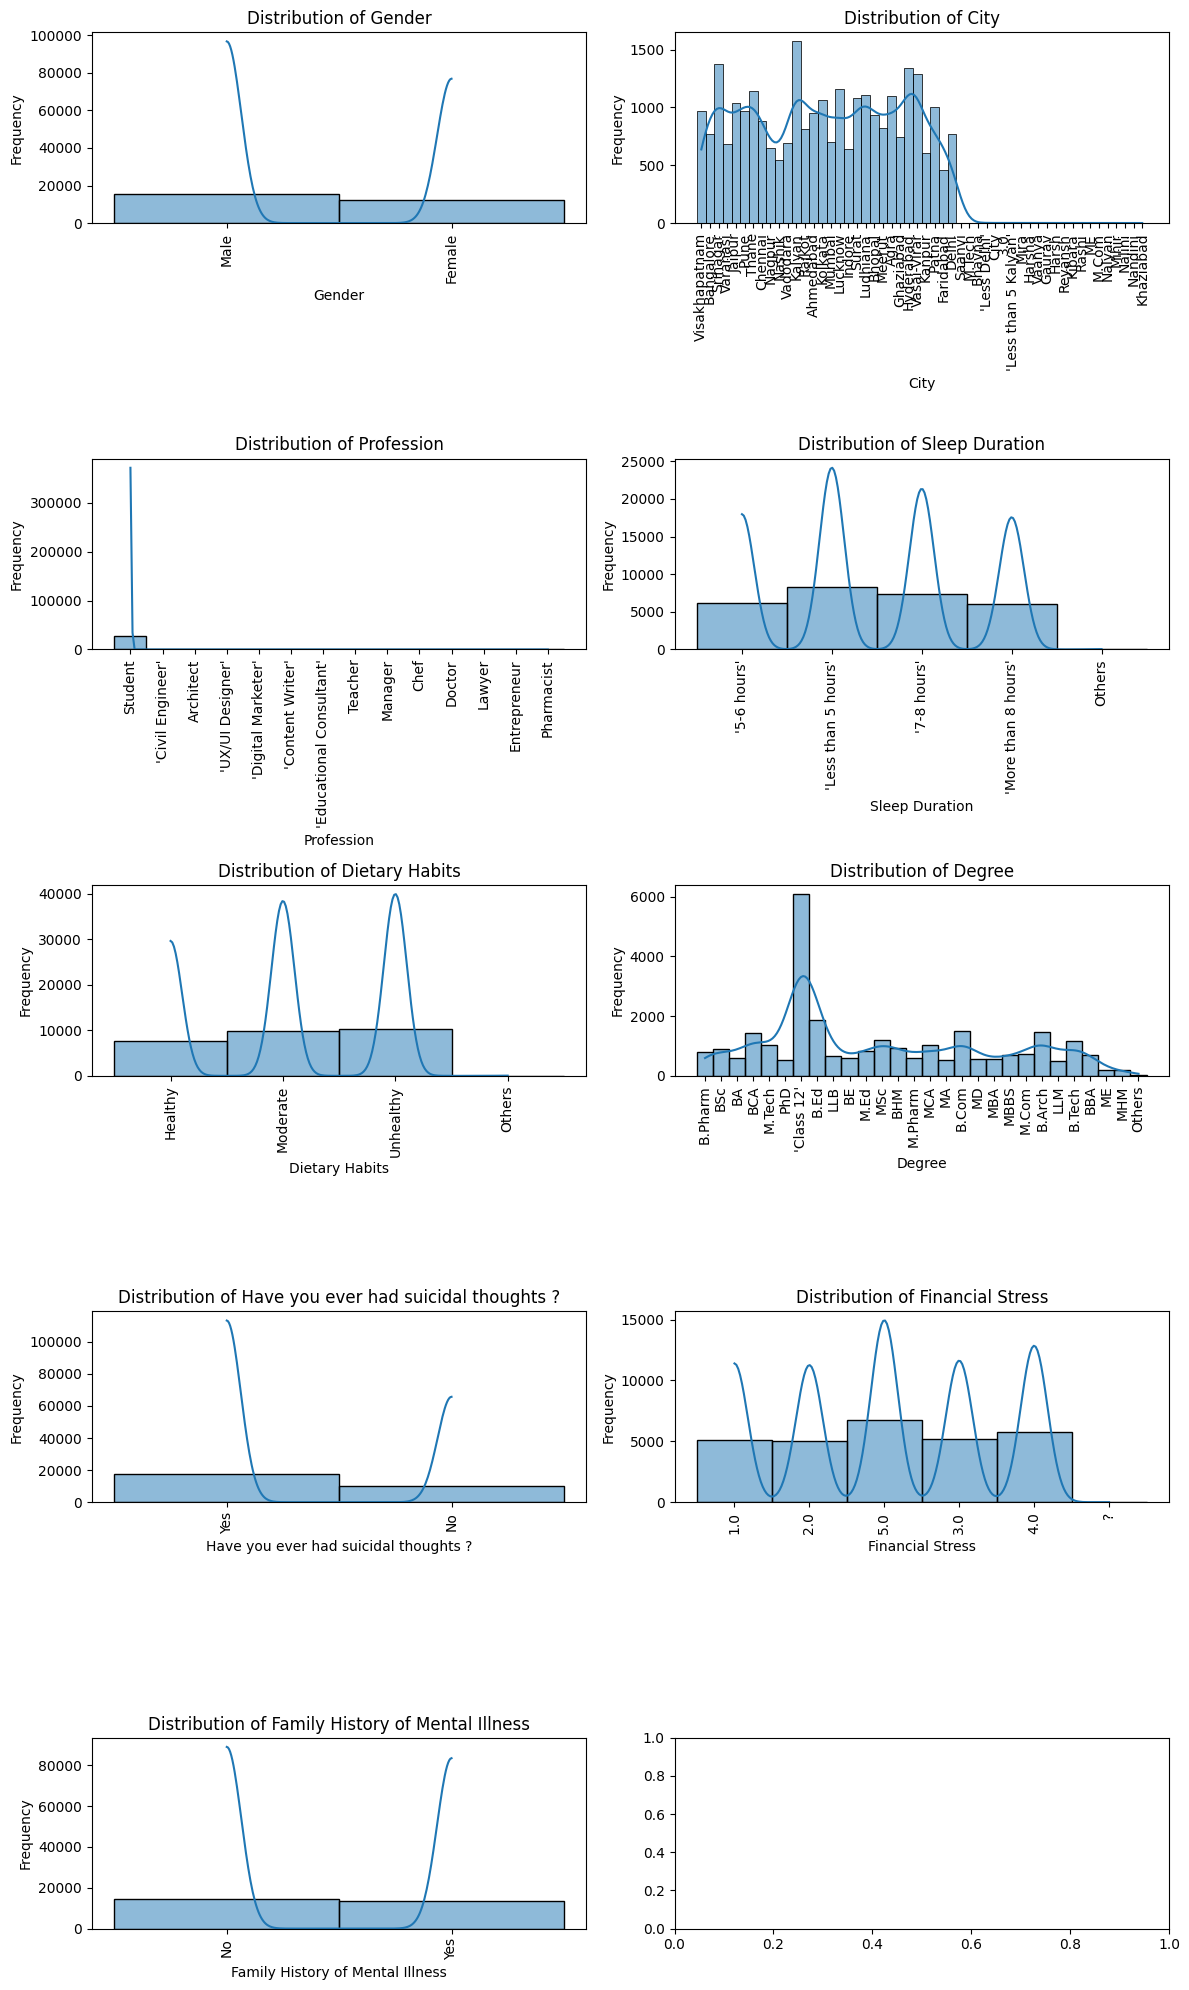

In [48]:
n=len(cat_cols)
cols=2
rows=math.ceil(n/cols)
fig,axes=plt.subplots(rows,cols,figsize=(cols*6,rows*4))
axes=axes.flatten()

for i , col in enumerate(cat_cols):
    sns.histplot(df[col],kde=True,ax=axes[i],bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.savefig(f"plots/{col}-distribution.png", dpi=300, bbox_inches='tight')
plt.show()

### Summary Statistics Table
This table provides an overview of central tendencies and variability for each numeric feature

/var/folders/rb/kd_jtytn23s8cqfkvty6zp5r0000gp/T/ipykernel_33810/1012865723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Paired')


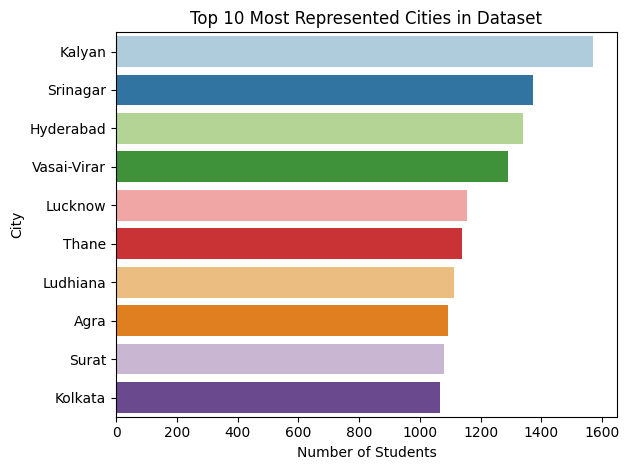

In [49]:
top_cities = df['City'].value_counts().nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Paired')
plt.title("Top 10 Most Represented Cities in Dataset")
plt.xlabel("Number of Students")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("plots/top_cities.png", dpi=300)


/var/folders/rb/kd_jtytn23s8cqfkvty6zp5r0000gp/T/ipykernel_33810/3622771745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded, x='Depression', palette='pastel')


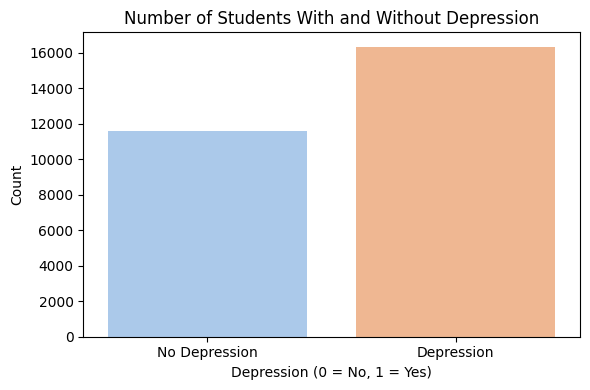

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_encoded, x='Depression', palette='pastel')
plt.title("Number of Students With and Without Depression")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Depression", "Depression"])
plt.tight_layout()
plt.show()


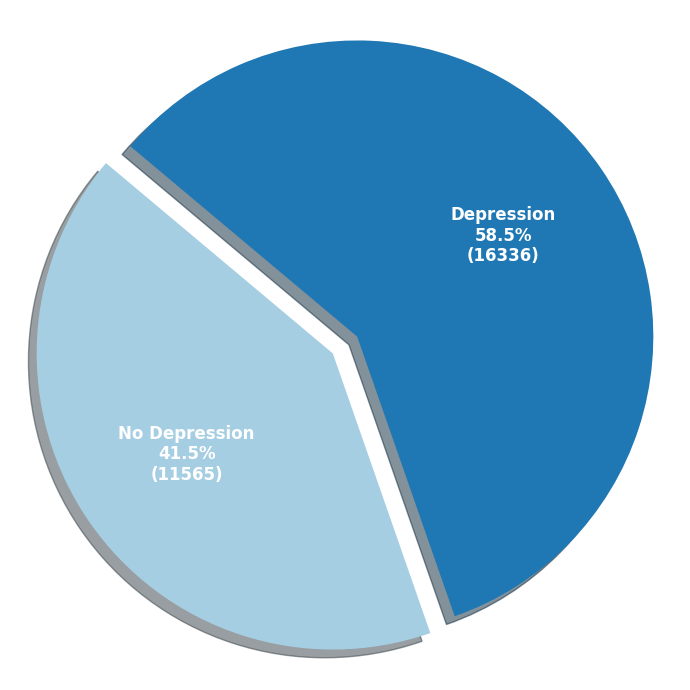

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

depression_counts = df_encoded['Depression'].value_counts().sort_index()
labels = ['No Depression', 'Depression']  
values = depression_counts.tolist()

colors = sns.color_palette('Paired')[:2]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    values,
    labels=None,
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

for i, (wedge, autotext) in enumerate(zip(wedges, autotexts)):
    label = labels[i]
    count = values[i]
    percentage = autotext.get_text()
    
    autotext.set_text(f"{label}\n{percentage}\n({count})")
    
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

for text in texts:
    text.set_text("")

#plt.title("Proportion of Students With and Without Depression", fontsize=14, weight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.savefig("plots/depression_pie_chart.png", dpi=300, bbox_inches='tight')

plt.show()




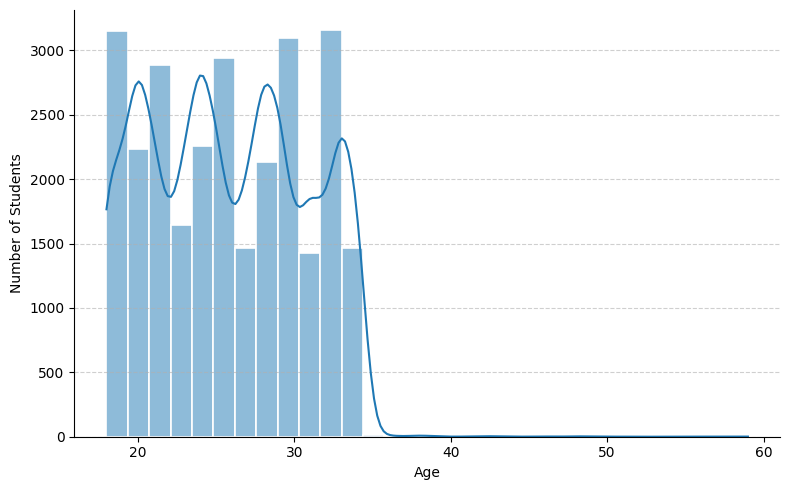

In [52]:
paired_color = sns.color_palette('Paired')[1] 

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color=paired_color, edgecolor='white', linewidth=1.2)

#plt.title("Distribution of Student Ages", fontsize=14, weight='bold', pad=10)
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.savefig("plots/age_distribution.png", dpi=300, bbox_inches='tight')

plt.show()



/var/folders/rb/kd_jtytn23s8cqfkvty6zp5r0000gp/T/ipykernel_33810/1364530096.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Gender', palette='Paired', edgecolor='white')


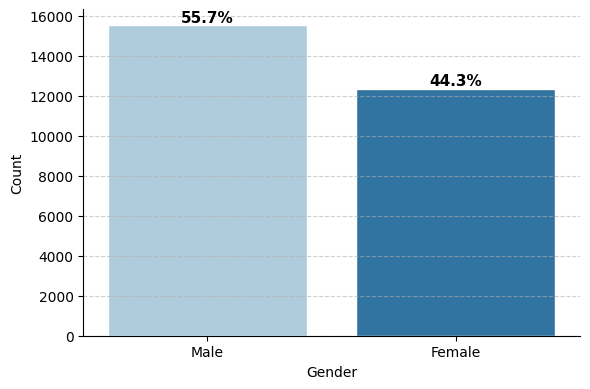

In [53]:
import numpy as np

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Gender', palette='Paired', edgecolor='white')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percent = f'{100 * height / total:.1f}%'
    ax.annotate(percent, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11, weight='bold',)

#plt.title("Gender Distribution Among Students", fontsize=14, weight='bold', pad=10)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.savefig("plots/gender_distribution.png", dpi=300, bbox_inches='tight')

plt.show()



In [54]:
cities_df = pd.read_csv("indian_cities.csv")
print(cities_df.columns)
print(cities_df.head())


Index(['City', 'Lat', 'Long', 'country', 'iso2', 'State'], dtype='object')
         City        Lat       Long country iso2          State
0      Abohar  30.144533  74.195520   India   IN         Punjab
1    Adilabad  19.400000  78.310000   India   IN      Telangana
2    Agartala  23.836049  91.279386   India   IN        Tripura
3        Agra  27.187935  78.003944   India   IN  Uttar Pradesh
4  Ahmadnagar  19.094571  74.738432   India   IN    Maharashtra


In [55]:
city_depression_counts = df[df['Depression'] == 1].groupby('City').size().reset_index(name='Depressed_Count')

city_total_counts = df.groupby('City').size().reset_index(name='Total_Students')

city_stats = pd.merge(city_total_counts, city_depression_counts, on='City', how='left')
city_stats['Depressed_Count'].fillna(0, inplace=True)

city_stats['Depression_Rate'] = city_stats['Depressed_Count'] / city_stats['Total_Students']

city_coords = cities_df[['City', 'Lat', 'Long']].drop_duplicates()

city_map_df = pd.merge(city_stats, city_coords, on='City', how='inner')



In [56]:
import folium
from folium import CircleMarker

m = folium.Map(location=[22.5, 78.9], zoom_start=5, tiles='CartoDB positron')

for _, row in city_map_df.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=5 + (row['Depression_Rate'] * 20), 
        popup=(f"<b>{row['City']}</b><br>"
               f"Depression Rate: {row['Depression_Rate']:.1%}<br>"
               f"Total Students: {int(row['Total_Students'])}"),
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.7
    ).add_to(m)

m.save("depression_map_india.html")


In [57]:
import pandas as pd
import folium
from folium import CircleMarker
import branca.colormap as cm


df = pd.read_csv("student_depression_cleaned.csv")
cities = pd.read_csv("indian_cities.csv")

# Clean city names
df['City'] = df['City'].str.strip().str.title()
cities['City'] = cities['City'].str.strip().str.title()

# Aggregate depression data by city
city_depressed = df[df['Depression'] == 1].groupby('City').size().reset_index(name='Depressed')
city_total = df.groupby('City').size().reset_index(name='Total')

# Merge stats
city_stats = pd.merge(city_total, city_depressed, on='City', how='left')
city_stats['Depressed'] = city_stats['Depressed'].fillna(0)
city_stats['Rate'] = city_stats['Depressed'] / city_stats['Total']

# Merge with coordinates
city_coords = cities[['City', 'Lat', 'Long']].drop_duplicates()
city_map_df = pd.merge(city_stats, city_coords, on='City', how='inner')

import folium

m = folium.Map(location=[22.5, 78.9], zoom_start=5, tiles='CartoDB positron')



# Create a color scale (0 to 1)
colormap = cm.LinearColormap(
    colors=['green', 'yellow', 'orange', 'red', 'darkred'],
    vmin=0, vmax=1,
    caption='Depression Rate'
)


for _, row in city_map_df.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=5 + (row['Rate'] * 15),
        popup=(f"<b>{row['City']}</b><br>"
               f"Depression Rate: {row['Rate']:.1%}<br>"
               f"Total Students: {int(row['Total'])}"),
        color=colormap(row['Rate']),
        fill=True,
        fill_color=colormap(row['Rate']),
        fill_opacity=0.75
    ).add_to(m)

m.save("city_depression_map_choropleth.html")
print("✅ Map saved as 'city_depression_map_choropleth.html'")



✅ Map saved as 'city_depression_map_choropleth.html'
